# Wine Quality Prediction

* Importing the Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
org_data = pd.read_csv("./wineQualityWhites.csv")

In [79]:
df = pd.DataFrame(org_data)

In [80]:
df.head()

Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.0              0.27         0.36            20.7   
1           2            6.3              0.30         0.34             1.6   
2           3            8.1              0.28         0.40             6.9   
3           4            7.2              0.23         0.32             8.5   
4           5            7.2              0.23         0.32             8.5   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

# Data Manupilation

In [81]:
df.columns = ['id',"fixed_acidity","volatile_acidity",'critic_acid',"residual_sugar",'chlorides','free_sulfur_dioxide',"total_sulfur_dioxide","density","PH","sulphates","alcohol","quality"]

In [82]:
df.head()

id  fixed_acidity  volatile_acidity  critic_acid  residual_sugar  \
0   1            7.0              0.27         0.36            20.7   
1   2            6.3              0.30         0.34             1.6   
2   3            8.1              0.28         0.40             6.9   
3   4            7.2              0.23         0.32             8.5   
4   5            7.2              0.23         0.32             8.5   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    PH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [83]:
df.tail()

id  fixed_acidity  volatile_acidity  critic_acid  residual_sugar  \
4893  4894            6.2              0.21         0.29             1.6   
4894  4895            6.6              0.32         0.36             8.0   
4895  4896            6.5              0.24         0.19             1.2   
4896  4897            5.5              0.29         0.30             1.1   
4897  4898            6.0              0.21         0.38             0.8   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    PH  \
4893      0.039                 24.0                  92.0  0.99114  3.27   
4894      0.047                 57.0                 168.0  0.99490  3.15   
4895      0.041                 30.0                 111.0  0.99254  2.99   
4896      0.022                 20.0                 110.0  0.98869  3.34   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
4893       0.50     11.2        6  
4894       0.46      9.6        5  
4895       0.46      9.4        6  
4896       0.38     12.8        7  
4897       0.32     11.8        6

In [84]:
df.shape

(4898, 13)

# Data Exploration

In [85]:
df.describe()

id  fixed_acidity  volatile_acidity  critic_acid  \
count  4898.000000    4898.000000       4898.000000  4898.000000   
mean   2449.500000       6.854788          0.278241     0.334192   
std    1414.075139       0.843868          0.100795     0.121020   
min       1.000000       3.800000          0.080000     0.000000   
25%    1225.250000       6.300000          0.210000     0.270000   
50%    2449.500000       6.800000          0.260000     0.320000   
75%    3673.750000       7.300000          0.320000     0.390000   
max    4898.000000      14.200000          1.100000     1.660000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     4898.000000  4898.000000          4898.000000           4898.000000   
mean         6.391415     0.045772            35.308085            138.360657   
std          5.072058     0.021848            17.007137             42.498065   
min          0.600000     0.009000             2.000000              9.000000   
25%          1.700000     0.036000            23.000000            108.000000   
50%          5.200000     0.043000            34.000000            134.000000   
75%          9.900000     0.050000            46.000000            167.000000   
max         65.800000     0.346000           289.000000            440.000000   

           density           PH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  4898.000000  
mean      0.994027     3.188267     0.489847    10.514267     5.877909  
std       0.002991     0.151001     0.114126     1.230621     0.885639  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.991723     3.090000     0.410000     9.500000     5.000000  
50%       0.993740     3.180000     0.470000    10.400000     6.000000  
75%       0.996100     3.280000     0.550000    11.400000     6.000000  
max       1.038980     3.820000     1.080000    14.200000     9.000000

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4898 non-null   int64  
 1   fixed_acidity         4898 non-null   float64
 2   volatile_acidity      4898 non-null   float64
 3   critic_acid           4898 non-null   float64
 4   residual_sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free_sulfur_dioxide   4898 non-null   float64
 7   total_sulfur_dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   PH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


* Checking Null Values

In [87]:
df.isnull().sum()

id                      0
fixed_acidity           0
volatile_acidity        0
critic_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
PH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [88]:
df.nunique()

id                      4898
fixed_acidity             68
volatile_acidity         125
critic_acid               87
residual_sugar           310
chlorides                160
free_sulfur_dioxide      132
total_sulfur_dioxide     251
density                  890
PH                       103
sulphates                 79
alcohol                  103
quality                    7
dtype: int64

# Data Visulization

* Correlation

In [89]:
df.corr()

id  fixed_acidity  volatile_acidity  critic_acid  \
id                    1.000000      -0.255814          0.002858    -0.149900   
fixed_acidity        -0.255814       1.000000         -0.022697     0.289181   
volatile_acidity      0.002858      -0.022697          1.000000    -0.149472   
critic_acid          -0.149900       0.289181         -0.149472     1.000000   
residual_sugar        0.006624       0.089021          0.064286     0.094212   
chlorides            -0.045645       0.023086          0.070512     0.114364   
free_sulfur_dioxide  -0.011929      -0.049396         -0.097012     0.094077   
total_sulfur_dioxide -0.161979       0.091070          0.089261     0.121131   
density              -0.185976       0.265331          0.027114     0.149503   
PH                   -0.115774      -0.425858         -0.031915    -0.163748   
sulphates             0.009808      -0.017143         -0.035728     0.062331   
alcohol               0.213656      -0.120881          0.067718    -0.075729   
quality               0.035763      -0.113663         -0.194723    -0.009209   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
id                          0.006624  -0.045645            -0.011929   
fixed_acidity               0.089021   0.023086            -0.049396   
volatile_acidity            0.064286   0.070512            -0.097012   
critic_acid                 0.094212   0.114364             0.094077   
residual_sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free_sulfur_dioxide         0.299098   0.101392             1.000000   
total_sulfur_dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
PH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total_sulfur_dioxide   density        PH  sulphates  \
id                               -0.161979 -0.185976 -0.115774   0.009808   
fixed_acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile_acidity                  0.089261  0.027114 -0.031915  -0.035728   
critic_acid                       0.121131  0.149503 -0.163748   0.062331   
residual_sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free_sulfur_dioxide               0.615501  0.294210 -0.000618   0.059217   
total_sulfur_dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
PH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
id                    0.213656  0.035763  
fixed_acidity        -0.120881 -0.113663  
volatile_acidity      0.067718 -0.194723  
critic_acid          -0.075729 -0.009209  
residual_sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free_sulfur_dioxide  -0.250104  0.008158  
total_sulfur_dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
PH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

* Correlation using Heatmap

In [90]:
import seaborn as sns


<Axes: >

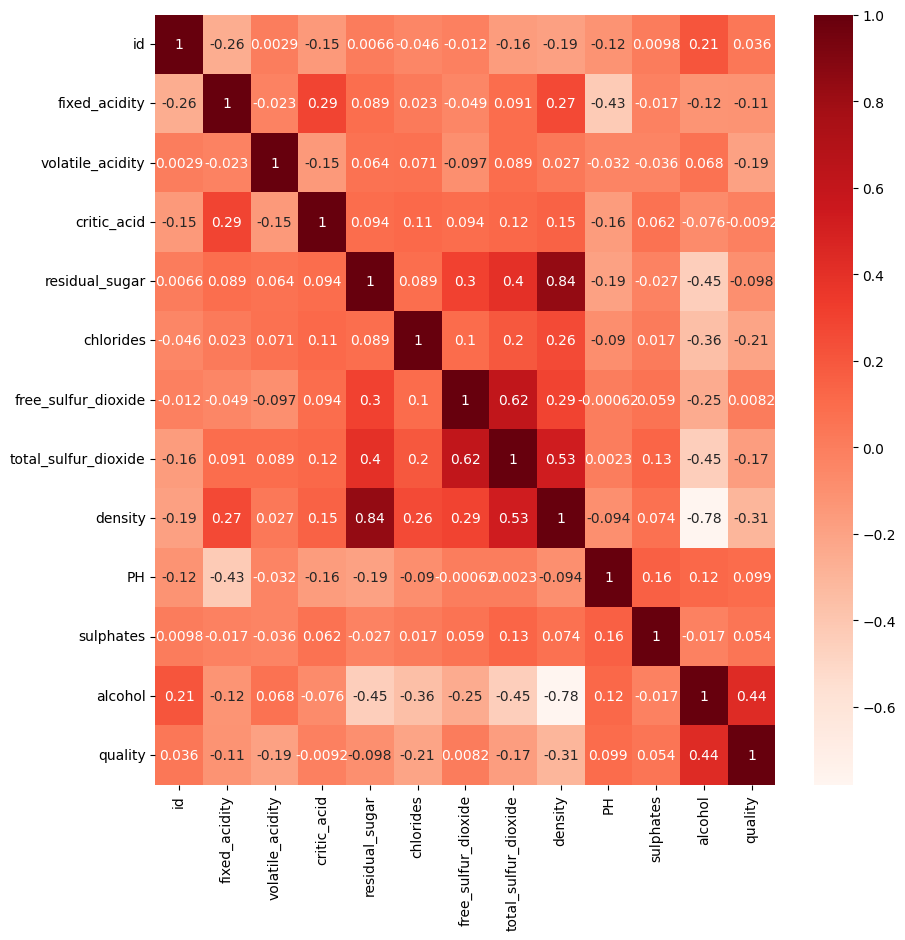

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

* Pairplot 

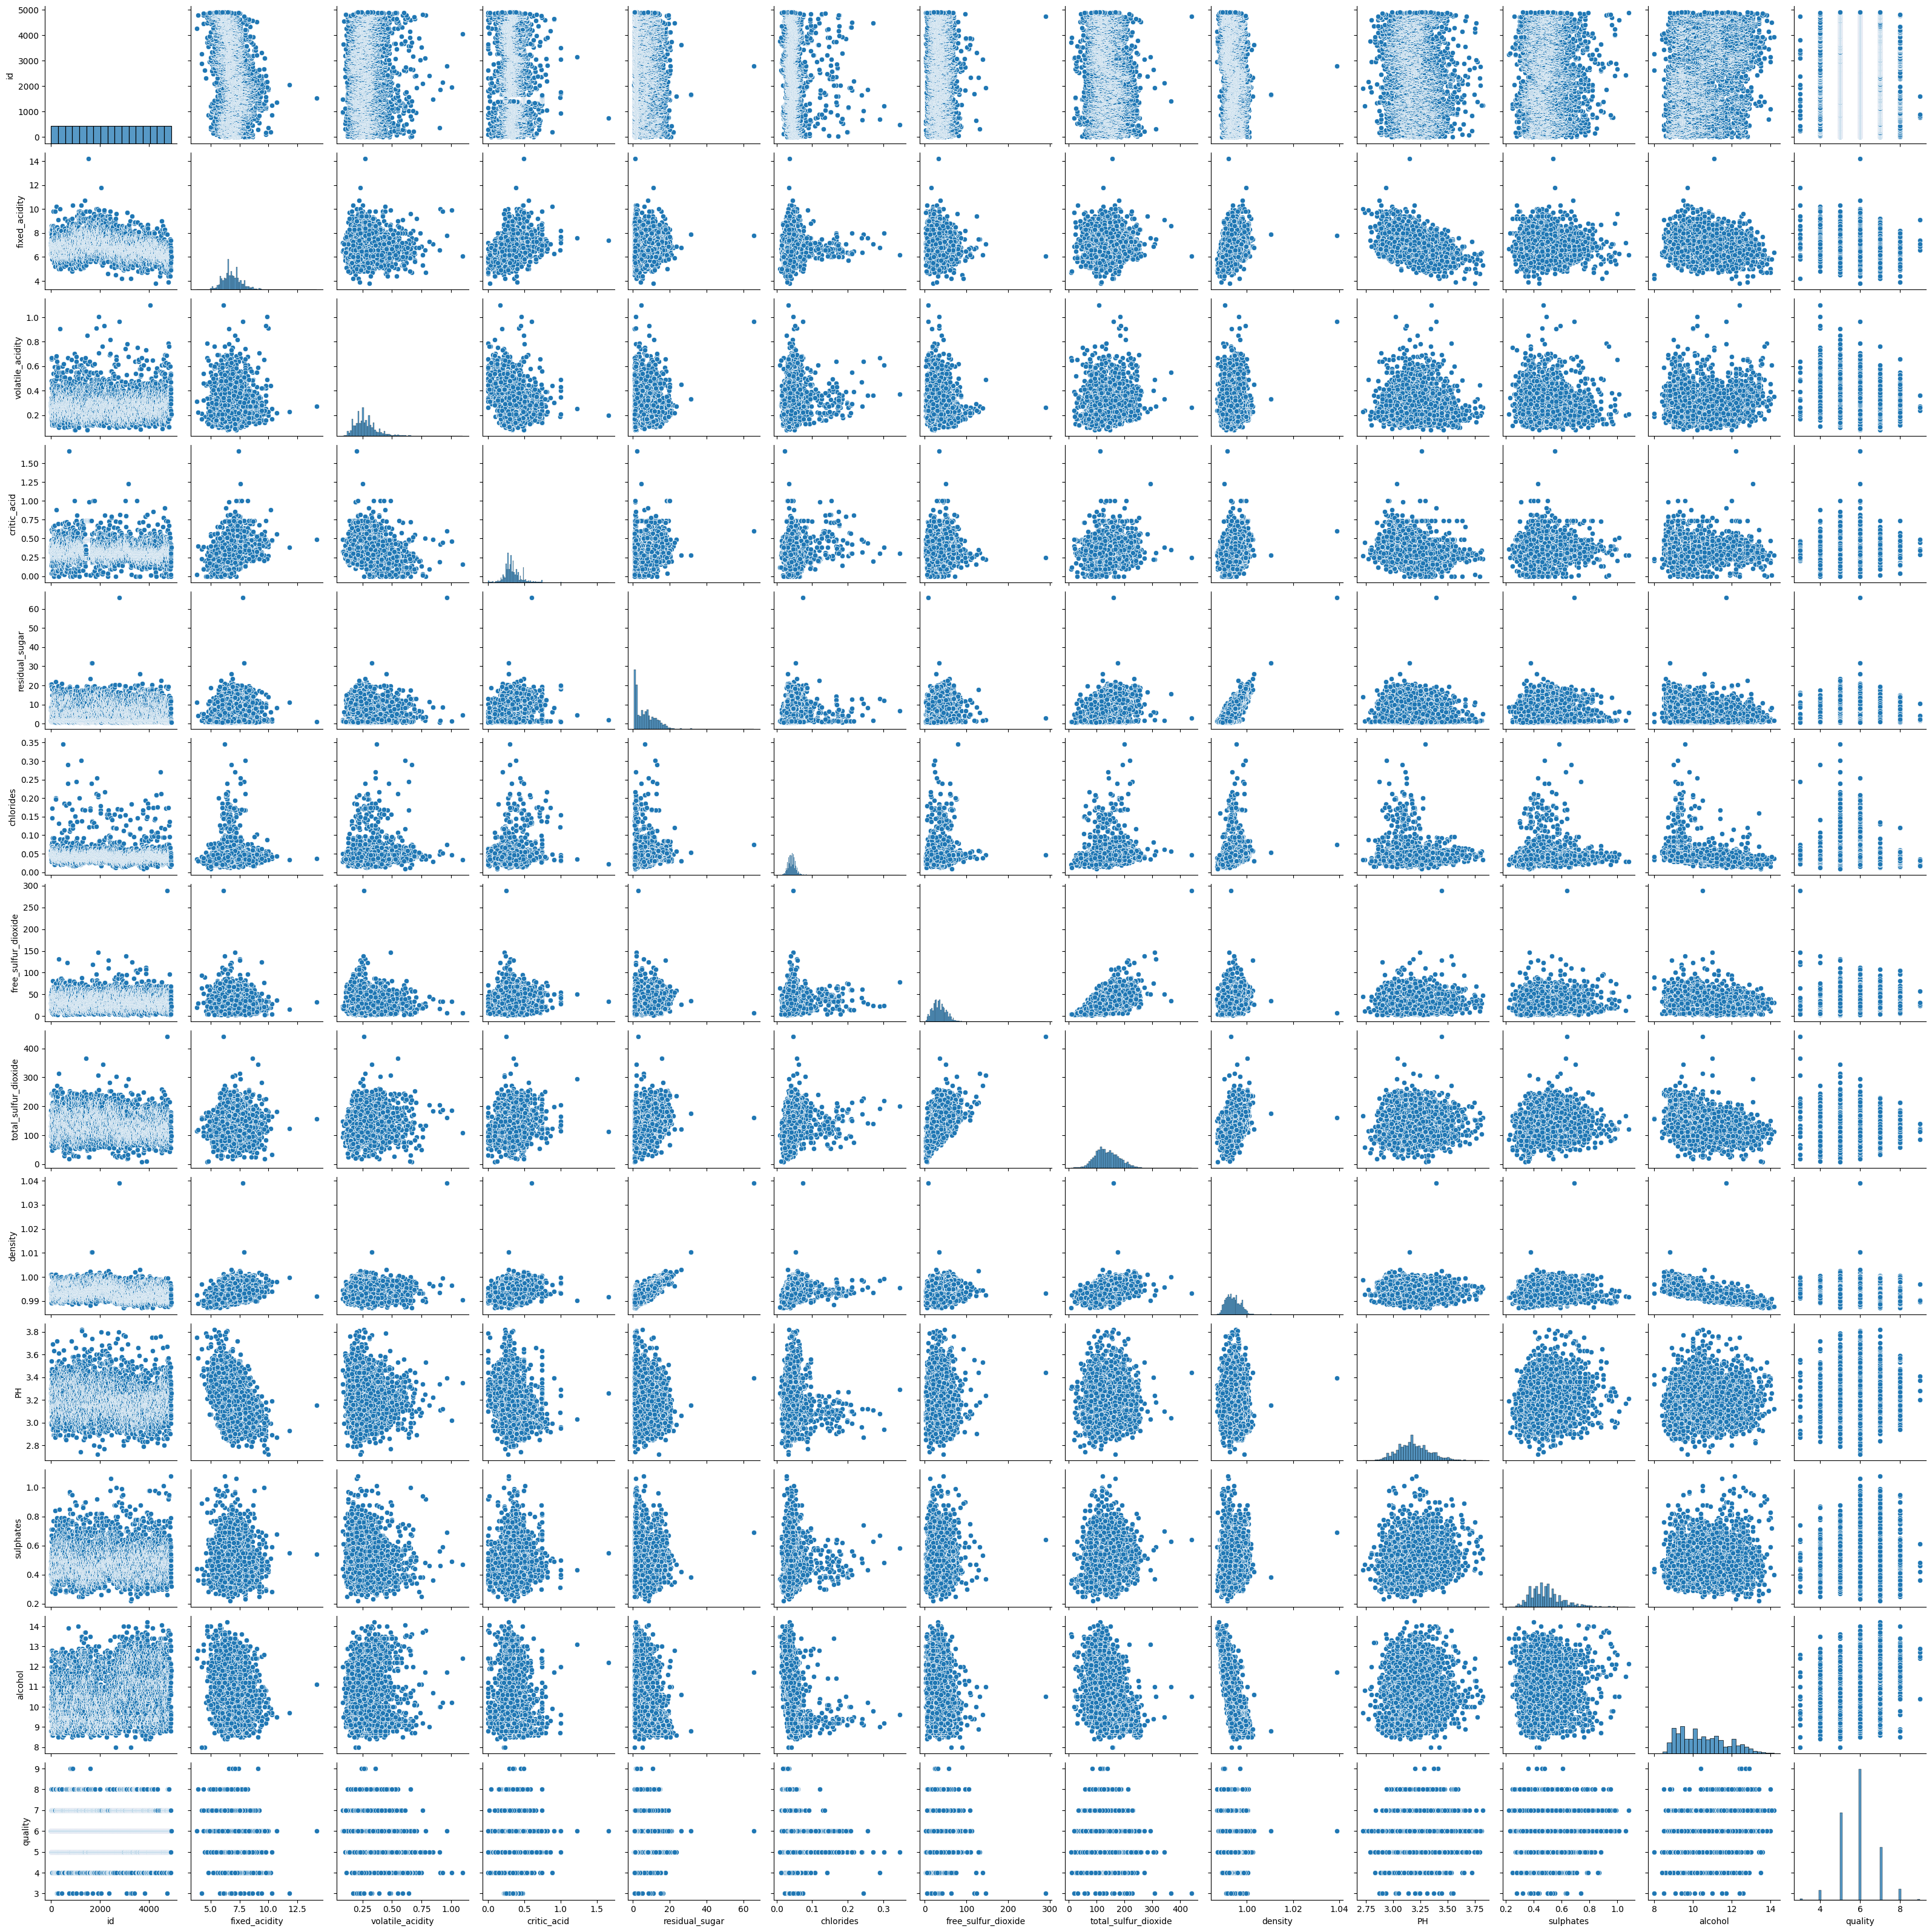

In [92]:
sns.pairplot(df)

# Machine Learning Linear Regression

In [93]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [94]:
x = np.array(df.drop(columns='quality'))

In [95]:
y = np.array(df.quality)

In [96]:
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(x,y,test_size=0.2,random_state=True)

In [97]:
print(len(XTRAIN))
print(len(YTRAIN))
print(len(XTEST))
print(len(YTEST))

3918
3918
980
980


* Choosing Model

* Suport Vector Regression

In [98]:
model = SVR()

In [99]:
model.fit(XTRAIN,YTRAIN)

SVR()

In [100]:
SVR_Pridict = model.predict(XTEST)

* Score Of the SVR model

In [101]:
print("Traing Score : ",model.score(XTRAIN,YTRAIN))
print("Testing Score : ",model.score(XTEST,YTEST))

Traing Score :  0.009875882646103062
Testing Score :  0.014690686712018786


* Linear Regression

In [102]:
model_liner = LinearRegression()

In [103]:
model_liner.fit(XTRAIN,YTRAIN,)

LinearRegression()

In [104]:
Liner_pridect = model_liner.predict(XTEST)

* Score Of the Linear Regression model

In [105]:
print("Traing Score : ",model_liner.score(XTRAIN,YTRAIN))
print("Testing Score : ",model_liner.score(XTEST,YTEST))

Traing Score :  0.28968953980449275
Testing Score :  0.30038009127128273


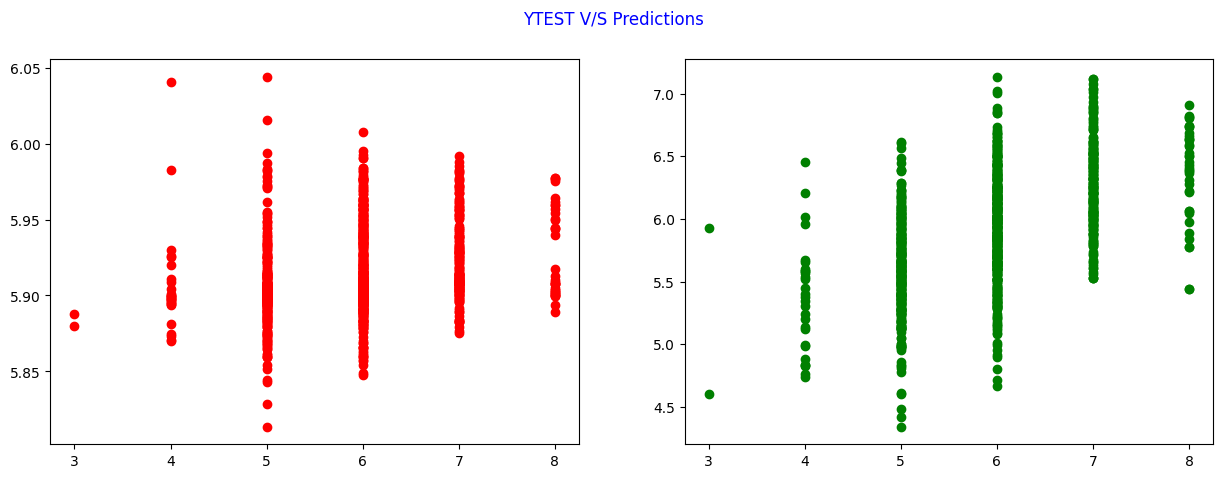

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle("YTEST V/S Predictions",color="blue")
plt.scatter(YTEST,SVR_Pridict,color='red')
plt.subplot(1,2,2)
plt.scatter(YTEST,Liner_pridect,color='green')

* Testing the performence of the model

In [107]:
SVR_ACCRACY= r2_score(YTEST,SVR_Pridict)
print("Accuracy Of the SVR model :",round(SVR_ACCRACY*100,2),"%")


Accuracy Of the SVR model : 1.47 %


In [108]:
Linear_model_Accuracy = r2_score(YTEST,Liner_pridect)
print("Accuracy Of the LINEAR model :",round(Linear_model_Accuracy*100,2),"%")

Accuracy Of the LINEAR model : 30.04 %


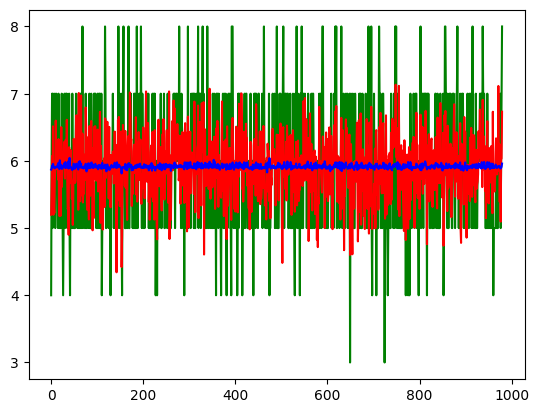

In [109]:
plt.plot(YTEST,color="green")
plt.plot(Liner_pridect,color="red")
plt.plot(SVR_Pridict,color="blue")

* Voilen Plot

Text(0.5, 1.0, 'Linear Predictions')

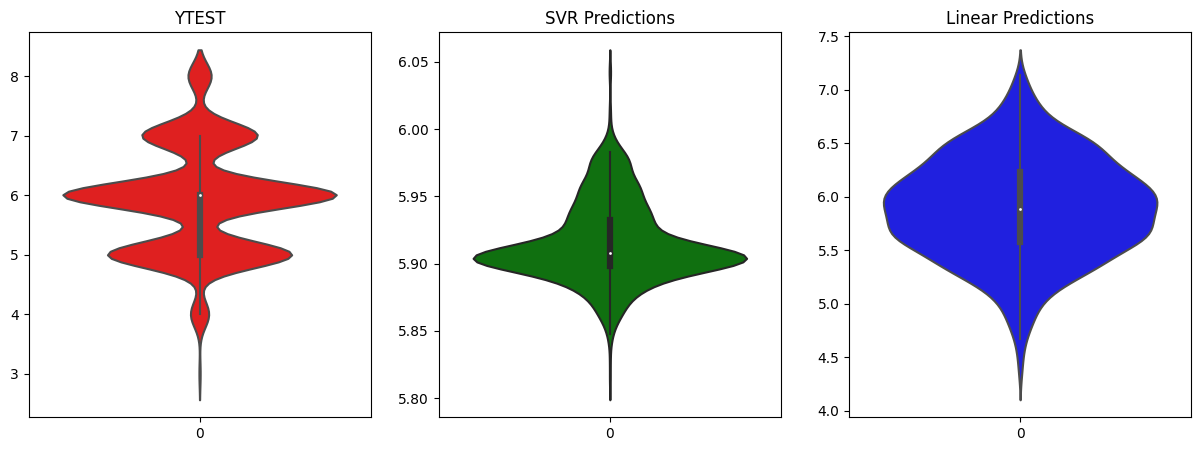

In [128]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.violinplot(YTEST,color="red",col="YTEST")
plt.title("YTEST")

plt.subplot(1,3,2)
sns.violinplot(SVR_Pridict,color="green",col="SVR Pridections")
plt.title("SVR Predictions")

plt.subplot(1,3,3)
sns.violinplot(Liner_pridect,color="blue",col="Linear Pridections")
plt.title("Linear Predictions")

YTEST & SVR Predictions =>  ([3, 8], [5.813453340795391, 6.044142190153557])
YTEST & Linear Predictions =>  [3, 8] [4.341785570214142, 7.13350227844694]


Text(0.5, 1.0, 'Actiual Value V/S  Linear Predected Value')

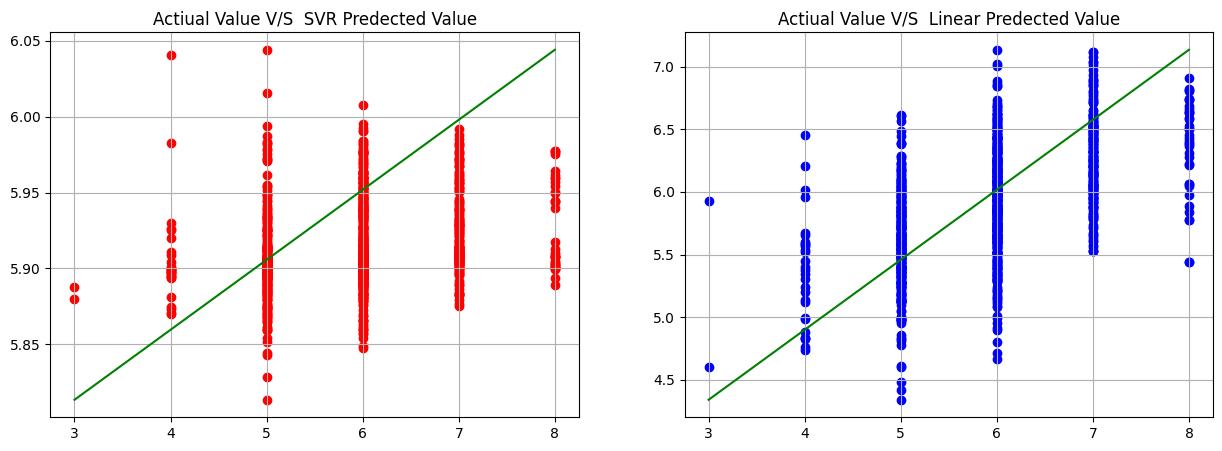

In [134]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(YTEST,SVR_Pridict,color="Red")
plt.grid()
print("YTEST & SVR Predictions => ",([min(YTEST),max(YTEST)],[min(SVR_Pridict),max(SVR_Pridict)]))
plt.plot([min(YTEST),max(YTEST)],[min(SVR_Pridict),max(SVR_Pridict)],color='green')
plt.title("Actiual Value V/S  SVR Predected Value")

plt.subplot(1,2,2)
plt.scatter(YTEST,Liner_pridect,color="blue")
plt.grid()
print("YTEST & Linear Predictions => ",[min(YTEST),max(YTEST)],[min(Liner_pridect),max(Liner_pridect)])
plt.plot([min(YTEST),max(YTEST)],[min(Liner_pridect),max(Liner_pridect)],color='green')
plt.title("Actiual Value V/S  Linear Predected Value")